<a href="https://colab.research.google.com/github/sentongo-web/MASTERS_DEGREE_PROJECT_MSDS/blob/main/project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIBRARIES FOR THE PROJECT

In [5]:
# importing libraries to be used in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

MOUNTING THE DRIVE

In [6]:
#Mounting the drive since dataset is saved on the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#setting path for the data dictionary and the dataset
file_path = '/content/drive/My Drive/uganda_imports.xlsx'

READING THE DATASET SAVED ON THE DRIVE

In [8]:
#Reading the dataset and the data dictionary
data = pd.read_excel(file_path)

| Attribute           | Description                                                       |
| :------------------ | :---------------------------------------------------------------- |
| TAR_HSC_NB1         | Harmonized system commodity code (HS code)                        |
| GDS_ORG_CTY         | Country of origin (code)                                          |
| VIT_WGT_GRS         | Gross mass (including packaging)                                  |
| VIT_WGT_NET         | Net mass (excluding packaging)                                    |
| TAR_PRI             | Item price                                                        |
| VIT_CIF             | CIF (Cost, Insurance, and Freight) value in local currency        |
| TAX_AMT             | Duties and taxes amount for the item                              |
| UNIT_PRICE_LOCAL    | Unit price in local currency                                      |
| TAR_VMT             | Valuation method                                                  |
| VIT_INV_AMT_NMU     | Invoice amount in national monetary units                         |
| VIT_INV_CUR_COD     | Currency code for the invoice                                     |
| VIT_CST             | Amount of added costs in national currency                        |
| VIT_IFR_AMT_NMU     | Amount of internal freight in national currency                   |
| VIT_OTC_AMT_NMU     | Additional charges in national monetary units                     |


VIEWING THE FIRST 5 RECORDS OF THE DATASET

In [9]:
data.head(5)

,HS_Code,Country_of_Origin,Gross_Mass,Net_Mass,Item_Price,CIF_Value,Duties_Taxes,Unit_Price_Local,Valuation_Method,Invoice_Amount_NMU,Invoice_Currency_Code,Added_Costs,Internal_Freight_NMU,Additional_Charges_NMU
0,85441900.0,CN,927.72,920.43,806.92,806.92,1035.37,NaN,NaN,806.92,USD,0.0,0.0,0.0
1,69010000.0,CN,21399.86,20000.00,2366.95,2366.95,380.94,NaN,NaN,2366.95,USD,0.0,0.0,0.0
2,83023000.0,CN,77.82,50.00,308.73,308.73,74.44,NaN,NaN,308.73,USD,0.0,0.0,0.0
3,94015000.0,CN,194.54,150.00,1285.39,1285.39,447.56,257.078,NaN,1285.39,USD,0.0,0.0,0.0
4,94031000.0,CN,194.54,150.00,1344.86,1344.86,468.26,268.972,NaN,1344.86,USD,0.0,0.0,0.0


SETTING THE EXCHANGE RATE TO CONVERT CURRENCIES TO UGX

In [10]:
# sample exchange rates to UGX (assuming these are provided)
exchange_rates = {
    'USD': 3700,   # sample rate
    'EUR': 4000,   # sample rate
    # Would add other necessary exchange rates here
}

In [11]:
# Convert all monetary columns to UGX
monetary_columns = ['Item_Price', 'CIF_Value', 'Duties_Taxes', 'Unit_Price_Local',
                    'Invoice_Amount_NMU', 'Added_Costs', 'Internal_Freight_NMU', 'Additional_Charges_NMU']

Applying conversion to all monetory columns

In [12]:
for column in monetary_columns:
    # since VIT_INV_CUR_COD indicates the currency of the monetary columns
    data[column] = data.apply(lambda row: row[column] * exchange_rates.get(row['Invoice_Currency_Code'], 1), axis=1)

In [13]:
# Drop the currency code column as all values are now in UGX
data.drop(columns=['Added_Costs','Internal_Freight_NMU','Additional_Charges_NMU'], inplace=True)

In [14]:
data.head()

,HS_Code,Country_of_Origin,Gross_Mass,Net_Mass,Item_Price,CIF_Value,Duties_Taxes,Unit_Price_Local,Valuation_Method,Invoice_Amount_NMU,Invoice_Currency_Code
0,85441900.0,CN,927.72,920.43,2985604.0,2985604.0,3830869.0,NaN,NaN,2985604.0,USD
1,69010000.0,CN,21399.86,20000.00,8757715.0,8757715.0,1409478.0,NaN,NaN,8757715.0,USD
2,83023000.0,CN,77.82,50.00,1142301.0,1142301.0,275428.0,NaN,NaN,1142301.0,USD
3,94015000.0,CN,194.54,150.00,4755943.0,4755943.0,1655972.0,951188.6,NaN,4755943.0,USD
4,94031000.0,CN,194.54,150.00,4975982.0,4975982.0,1732562.0,995196.4,NaN,4975982.0,USD


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   HS_Code                1047822 non-null  float64
 1   Country_of_Origin      1047493 non-null  object 
 2   Gross_Mass             992545 non-null   float64
 3   Net_Mass               992529 non-null   float64
 4   Item_Price             697458 non-null   float64
 5   CIF_Value              992356 non-null   float64
 6   Duties_Taxes           1031847 non-null  float64
 7   Unit_Price_Local       113 non-null      float64
 8   Valuation_Method       7 non-null        object 
 9   Invoice_Amount_NMU     992303 non-null   float64
 10  Invoice_Currency_Code  958119 non-null   object 
dtypes: float64(8), object(3)
memory usage: 88.0+ MB


In [16]:
data.shape

(1048575, 11)

DATA CLEANING

Checking and cleaning duplicates in the data

In [17]:
# Check for duplicate rows in the DataFrame
duplicates = data.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

# Calculate the percentage of duplicate rows
percentage_duplicates = (num_duplicates / len(data)) * 100

# Display the result
print(f"Number of duplicate rows: {num_duplicates}")
print(f"Percentage of duplicate rows: {percentage_duplicates:.2f}%")

Number of duplicate rows: 146360
Percentage of duplicate rows: 13.96%


In [18]:
# Drop duplicate rows
if percentage_duplicates > 0:
    data_processed = data.drop_duplicates().reset_index(drop=True)
    print("Duplicate rows have been dropped.")
else:
    print("No duplicate rows found.")

Duplicate rows have been dropped.


MISSING VALUES
Guide source: https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python

In [19]:
# Calculate the total number of missing values
total_missing = data.isnull().sum().sum()

# Calculate the percentage of missing values relative to the entire dataset
total_cells = data.size
overall_missing_percentage = (total_missing / total_cells) * 100

# Display the result
print(f"Overall missing values: {total_missing}")
print(f"Percentage of missing values in the entire dataset: {overall_missing_percentage:.2f}%")


Overall missing values: 2781733
Percentage of missing values in the entire dataset: 24.12%


Further guide: https://medium.com/@abhi2652254/how-to-handle-missing-values-using-python-8965e80ecc42

In [20]:
# Check for missing values in the DataFrame
missing_values = data.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(data)) * 100

# Display the result
print("Missing values (count and percentage):")
print(pd.DataFrame({'Missing Count': missing_values, 'Percentage': missing_percentage}))

Missing values (count and percentage):
                       Missing Count  Percentage
HS_Code                          753    0.071812
Country_of_Origin               1082    0.103188
Gross_Mass                     56030    5.343442
Net_Mass                       56046    5.344968
Item_Price                    351117   33.485158
CIF_Value                      56219    5.361467
Duties_Taxes                   16728    1.595308
Unit_Price_Local             1048462   99.989223
Valuation_Method             1048568   99.999332
Invoice_Amount_NMU             56272    5.366521
Invoice_Currency_Code          90456    8.626565


The approach taken here is to drop columns that have missing values that are above 60% while maintaining the target column

In [21]:
# Calculate missing value percentages for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Identify columns to drop (more than 60% missing values), excluding the target variable
columns_to_drop = [
    col for col in missing_percentage[missing_percentage > 60].index
    if col != 'Unit_Price_Local'
]

# Drop the identified columns
data_processed = data.drop(columns=columns_to_drop)
print(f"Columns dropped due to >60% missing values (excluding target): {columns_to_drop}")

# Handle missing values for the remaining columns
for column in data.columns:
    if column != 'Unit_Price_Local':  # Exclude the target variable from general imputation
        if data[column].dtype == 'float64':  # Numeric columns
            # Impute with the mean
            data[column].fillna(data[column].mean(), inplace=True)
            print(f"Numeric column '{column}' missing values filled with mean.")
        elif data[column].dtype == 'object':  # Categorical columns
            # Impute with the mode
            data[column].fillna(data[column].mode()[0], inplace=True)
            print(f"Categorical column '{column}' missing values filled with mode.")

# Retain `UNIT_PRICE_LOCAL` as-is for now, missing values will need a separate strategy
print(f"\nTarget variable 'Unit_Price_Local' retained with {data['Unit_Price_Local'].isnull().sum()} missing values.")


Columns dropped due to >60% missing values (excluding target): ['Valuation_Method']
Numeric column 'HS_Code' missing values filled with mean.
Categorical column 'Country_of_Origin' missing values filled with mode.
Numeric column 'Gross_Mass' missing values filled with mean.
Numeric column 'Net_Mass' missing values filled with mean.
Numeric column 'Item_Price' missing values filled with mean.
Numeric column 'CIF_Value' missing values filled with mean.
Numeric column 'Duties_Taxes' missing values filled with mean.
Categorical column 'Valuation_Method' missing values filled with mode.
Numeric column 'Invoice_Amount_NMU' missing values filled with mean.
Categorical column 'Invoice_Currency_Code' missing values filled with mode.

Target variable 'Unit_Price_Local' retained with 1048462 missing values.


###DESCRIPTIVE STATISTICS TO DETERMINE ANY OUTLIERS FROM DATA DISTRIBUTION

In [22]:
data.describe()

,HS_Code,Gross_Mass,Net_Mass,Item_Price,CIF_Value,Duties_Taxes,Unit_Price_Local,Invoice_Amount_NMU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.130000e+02,1.048575e+06
mean,6.265497e+07,2.114804e+04,1.960712e+04,3.539403e+07,7.060577e+07,4.322340e+06,3.987162e+06,6.818797e+07
std,2.875794e+07,1.873643e+06,1.704238e+06,9.377831e+08,1.880215e+10,5.474340e+07,1.772111e+07,1.879463e+10
min,6.900000e+01,1.000000e-02,-4.500000e+03,1.000000e-02,0.000000e+00,-1.293984e+08,2.301058e-02,0.000000e+00
25%,3.819000e+07,1.000000e+02,1.000000e+02,3.700000e+05,1.894770e+05,1.428200e+04,1.119779e+04,1.628740e+05
50%,7.607110e+07,3.838400e+02,3.085400e+02,6.937500e+06,1.311391e+06,1.522180e+05,7.502158e+04,1.191844e+06
75%,8.703233e+07,1.731760e+03,1.528000e+03,3.539403e+07,1.110000e+07,1.126132e+06,4.440000e+05,9.834600e+06
max,9.940161e+07,7.826577e+08,7.624320e+08,7.264626e+11,1.428659e+13,8.696450e+09,1.558330e+08,1.428659e+13


## KEY INSIGHTS
### Insights for Detecting Overvaluation/Undervaluation
Key Features for Detecting Import Valuation Anomalies:

CIF_Value, Duties_Taxes, and Unit_Price_Local are primary indicators for import valuation.
Anomalies such as very low CIF values combined with high Duties_Taxes could indicate undervaluation to avoid tariffs.
Extremely high Unit_Price_Local compared to CIF could signal overvaluation.
Outlier Management:

Outliers, especially in CIF_Value, Duties_Taxes, and Unit_Price_Local, may distort the model. Identify and analyze these records to understand if they represent genuine anomalies or errors.
Potential Correlations:

Variables like Net_Mass, Item_Price, and CIF_Value are likely correlated. Correlation analysis is necessary to understand their relationships and refine model inputs.
Data Quality Concerns:

Negative values (e.g., in Net_Mass, Item_Price, Duties_Taxes) and missing records (e.g., Unit_Price_Local) need resolution before building models.
Imputation techniques or domain-specific adjustments may be required for missing or erroneous data.
Modeling Challenges:

Extreme skewness and variability across variables will require log transformations or scaling.
Sparse data in Unit_Price_Local may limit its predictive power unless addressed.
Recommendations for Project Goal
Feature Engineering:

Create derived metrics like Price per Unit Mass (CIF_Value / Net_Mass) to better identify valuation discrepancies.
Introduce categorical encodings for HS_Code to group similar product types.
Anomaly Detection:

Use unsupervised techniques (e.g., Isolation Forest, One-Class SVM) alongside supervised models to detect undervaluation or overvaluation.
Establish thresholds based on historical data to classify imports as over- or undervalued.
Data Preprocessing:

Address missing and erroneous data.
Handle outliers robustly by identifying genuine anomalies versus data entry errors.
Modeling Pipeline:

Focus on predictive models using variables like Net_Mass, CIF_Value, and Duties_Taxes.
Validate models on known cases of over- or undervaluation to ensure precision.

### DETECTING OUTLIERS USING THE IQR METHOD
The Interquartile Range (IQR) method is a robust way to detect outliers.

In [23]:
# Detect outliers using the IQR method for all numeric columns
numeric_columns = data.select_dtypes(include=['float64']).columns

outliers_summary = {}

for column in numeric_columns:
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Save summary of outliers
    outliers_summary[column] = {
        "num_outliers": len(outliers),
        "lower_bound": lower_bound,
        "upper_bound": upper_bound
    }

    print(f"{column}: {len(outliers)} outliers detected.")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}\n")

# Optional: Display the full summary of outliers for analysis
print("\nOutliers Summary:")
print(pd.DataFrame(outliers_summary).T)


HS_Code: 0 outliers detected.
Lower Bound: -35073493.5, Upper Bound: 160295822.5

Gross_Mass: 181196 outliers detected.
Lower Bound: -2347.64, Upper Bound: 4179.4

Net_Mass: 183756 outliers detected.
Lower Bound: -2042.0, Upper Bound: 3670.0

Item_Price: 37246 outliers detected.
Lower Bound: -52166038.82673383, Upper Bound: 87930064.71122304

CIF_Value: 190920 outliers detected.
Lower Bound: -16176307.5, Upper Bound: 27465784.5

Duties_Taxes: 171188 outliers detected.
Lower Bound: -1653493.0, Upper Bound: 2793907.0

Unit_Price_Local: 21 outliers detected.
Lower Bound: -638005.5357142857, Upper Bound: 1093203.3214285714

Invoice_Amount_NMU: 191872 outliers detected.
Lower Bound: -14344715.0, Upper Bound: 24342189.0


Outliers Summary:
                    num_outliers   lower_bound   upper_bound
HS_Code                      0.0 -3.507349e+07  1.602958e+08
Gross_Mass              181196.0 -2.347640e+03  4.179400e+03
Net_Mass                183756.0 -2.042000e+03  3.670000e+03
Item_Price  

TREATMENT OF OUTLIERS WITH DATA TRIMMING

In [24]:
# Define a function to trim values based on the IQR bounds
def trim_outliers(df, column, lower_bound, upper_bound):
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# List of columns and their IQR bounds for trimming (updated with the new results)
outlier_bounds = {
    'HS_Code': (-3.507349e+07, 1.602958e+08),
    'Gross_Mass': (-2.347640e+03, 4.179400e+03),
    'Net_Mass': (-2.042000e+03, 3.670000e+03),
    'Item_Price': (-5.216604e+07, 8.793006e+07),
    'CIF_Value': (-1.617631e+07, 2.746578e+07),
    'Duties_Taxes': (-1.653493e+06, 2.793907e+06),
    'Unit_Price_Local': (-6.380055e+05, 1.093203e+06),
    'Invoice_Amount_NMU': (-1.434472e+07, 2.434219e+07),
}

# Trim outliers for each column based on the provided bounds
for column, (lower_bound, upper_bound) in outlier_bounds.items():
    trim_outliers(data_processed, column, lower_bound, upper_bound)

# Confirm the trimming is done by checking the summary of trimmed columns
print("Outlier trimming complete. Here is the summary of the adjusted columns:")
print(data_processed.describe())


Outlier trimming complete. Here is the summary of the adjusted columns:
            HS_Code     Gross_Mass       Net_Mass    Item_Price     CIF_Value  \
count  1.047822e+06  992545.000000  992529.000000  6.974580e+05  9.923560e+05   
mean   6.265497e+07    1031.602026     907.714197  1.099069e+07  6.281249e+06   
std    2.876827e+07    1395.920829    1240.853042  2.330472e+07  9.622234e+06   
min    6.900000e+01       0.010000   -2042.000000  1.000000e-02  0.000000e+00   
25%    3.819000e+07     100.000000     100.000000  1.213230e+05  1.676748e+05   
50%    7.607200e+07     326.090000     265.000000  9.624440e+05  1.116438e+06   
75%    8.703233e+07    1246.330000    1116.800000  6.872121e+06  7.652867e+06   
max    9.940161e+07    4179.400000    3670.000000  8.793006e+07  2.746578e+07   

       Duties_Taxes  Unit_Price_Local  Invoice_Amount_NMU  
count  1.031847e+06      1.130000e+02        9.923030e+05  
mean   7.095070e+05      3.061191e+05        5.586563e+06  
std    1.018972e+0

## confirming outliers existence with BOXPLOTS

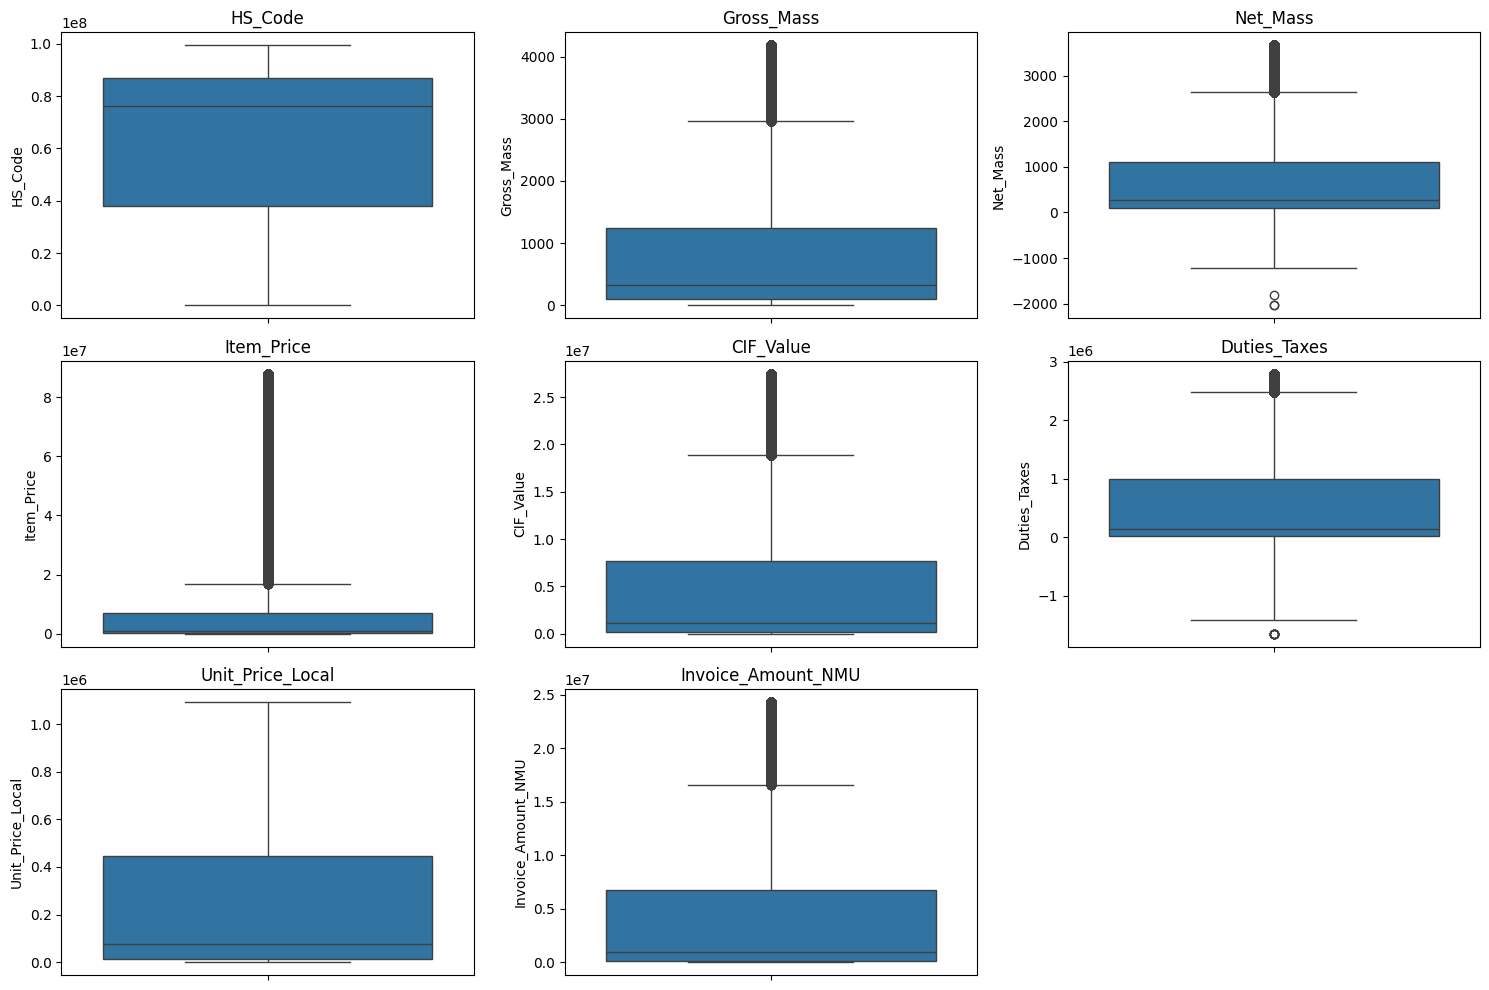

In [25]:
plt.figure(figsize=(15, 10))  # Adjusting figure size as needed
num_cols = len(data_processed.select_dtypes(include=['float64']).columns)
# Calculate the number of rows and columns for subplots
num_rows = (num_cols + 2) // 3  # Ensure enough rows to accommodate all columns

for i, col in enumerate(data_processed.select_dtypes(include=['float64']).columns):
    plt.subplot(num_rows, 3, i + 1)  # Dynamically adjust subplot grid
    sns.boxplot(y=data_processed[col])
    plt.title(col)
    plt.tight_layout()  # Adjust spacing between subplots

plt.show()

There still exists outliers in the Duties and Net mass. Since these are importsnt columns, its importsnt to completely clean these outliers to be able to feed the model clean data and to avoit poor performance of the model

In [26]:
# Function to calculate the number of outliers in a column
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers)

# Function to calculate the percentage of outliers in each column and overall
def calculate_outliers_percentage(df):
    total_outliers = 0
    total_values = df.size
    outliers_summary = {}

    numeric_columns = df.select_dtypes(include=['number']).columns

    for column in numeric_columns:
        num_outliers = count_outliers(df[column])
        outliers_summary[column] = num_outliers
        total_outliers += num_outliers

    overall_percentage = (total_outliers / total_values) * 100
    outliers_summary['Overall_Percentage'] = overall_percentage
    return outliers_summary

# Assuming you have loaded your data into a dataframe named `data_processed`
outliers_summary = calculate_outliers_percentage(data_processed)

# Display the results
outliers_summary_df = pd.DataFrame(list(outliers_summary.items()), columns=['Column', 'Num_Outliers'])
print(outliers_summary_df)


               Column   Num_Outliers
0             HS_Code       0.000000
1          Gross_Mass  148623.000000
2            Net_Mass  146954.000000
3          Item_Price  109958.000000
4           CIF_Value  157487.000000
5        Duties_Taxes  164738.000000
6    Unit_Price_Local       0.000000
7  Invoice_Amount_NMU  161150.000000
8  Overall_Percentage       8.477314


In [28]:
# Define a function to trim values based on the IQR bounds
def trim_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Apply the trimming function to each numeric column with outliers
numeric_columns = data_processed.select_dtypes(include=['number']).columns

for column in numeric_columns:
    trim_outliers(data_processed, column)

# Confirm the trimming is done by checking the summary of the adjusted columns
print("Outlier trimming complete. Here is the summary of the adjusted columns:")


Outlier trimming complete. Here is the summary of the adjusted columns:


VISUALIZE OUTLIERS AGAIN

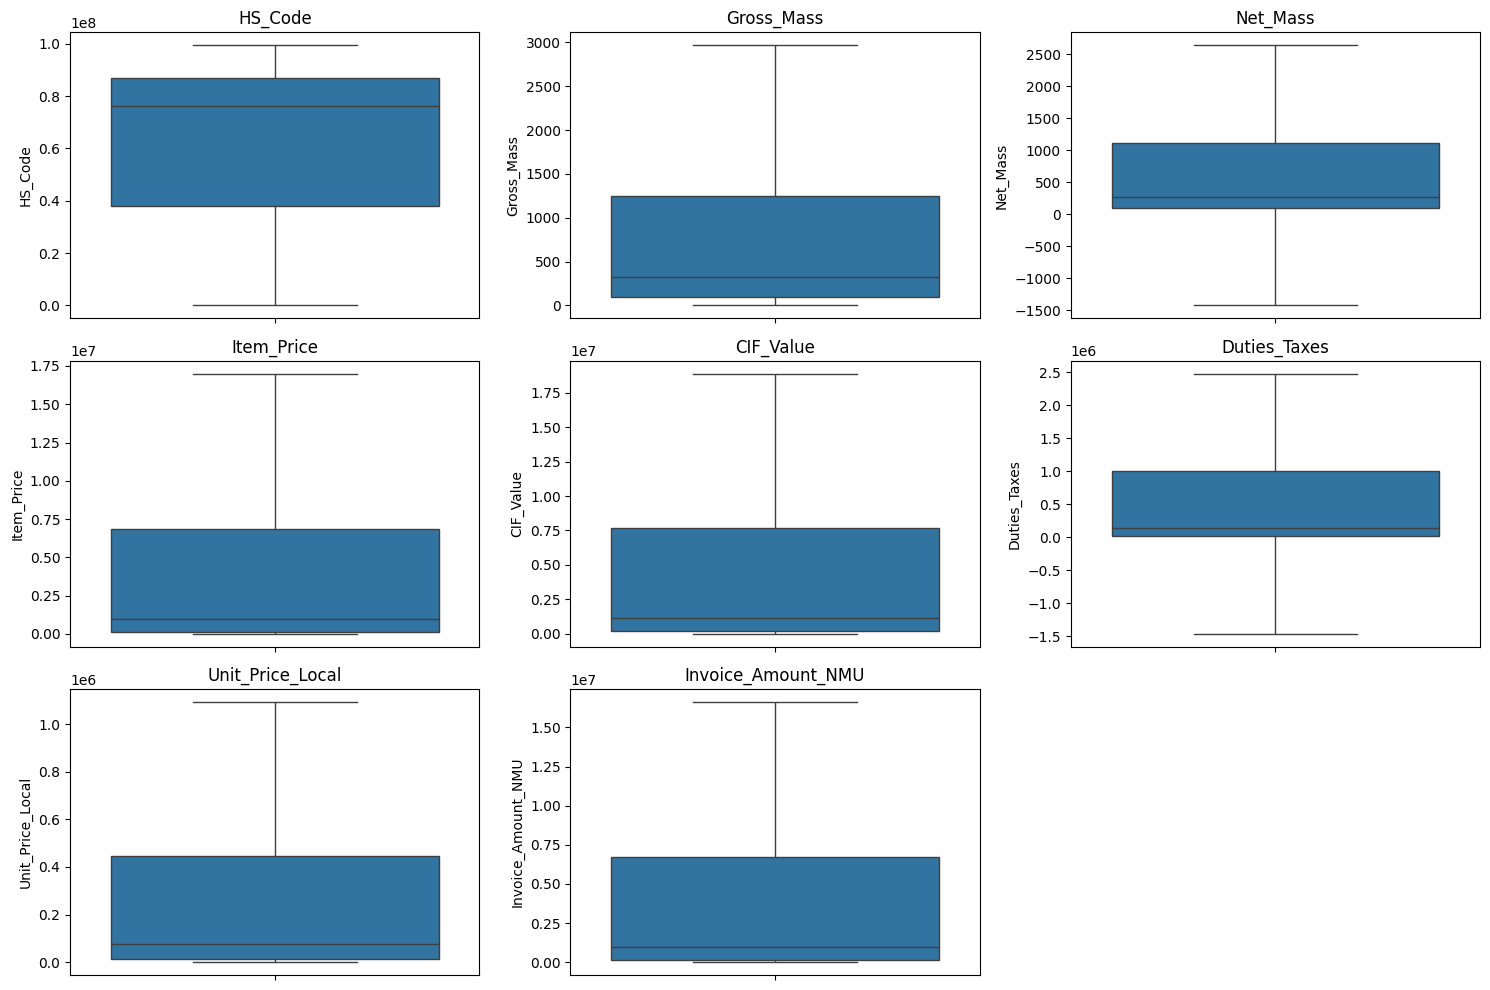

In [29]:
plt.figure(figsize=(15, 10))  # Adjusting figure size as needed
num_cols = len(data_processed.select_dtypes(include=['float64']).columns)
# Calculate the number of rows and columns for subplots
num_rows = (num_cols + 2) // 3  # Ensure enough rows to accommodate all columns

for i, col in enumerate(data_processed.select_dtypes(include=['float64']).columns):
    plt.subplot(num_rows, 3, i + 1)  # Dynamically adjust subplot grid
    sns.boxplot(y=data_processed[col])
    plt.title(col)
    plt.tight_layout()  # Adjust spacing between subplots

plt.show()

From the above, the outliers are cleaned.

MORE DATA VISUALIZATION
CHECKING FOR DISTRUBUTION

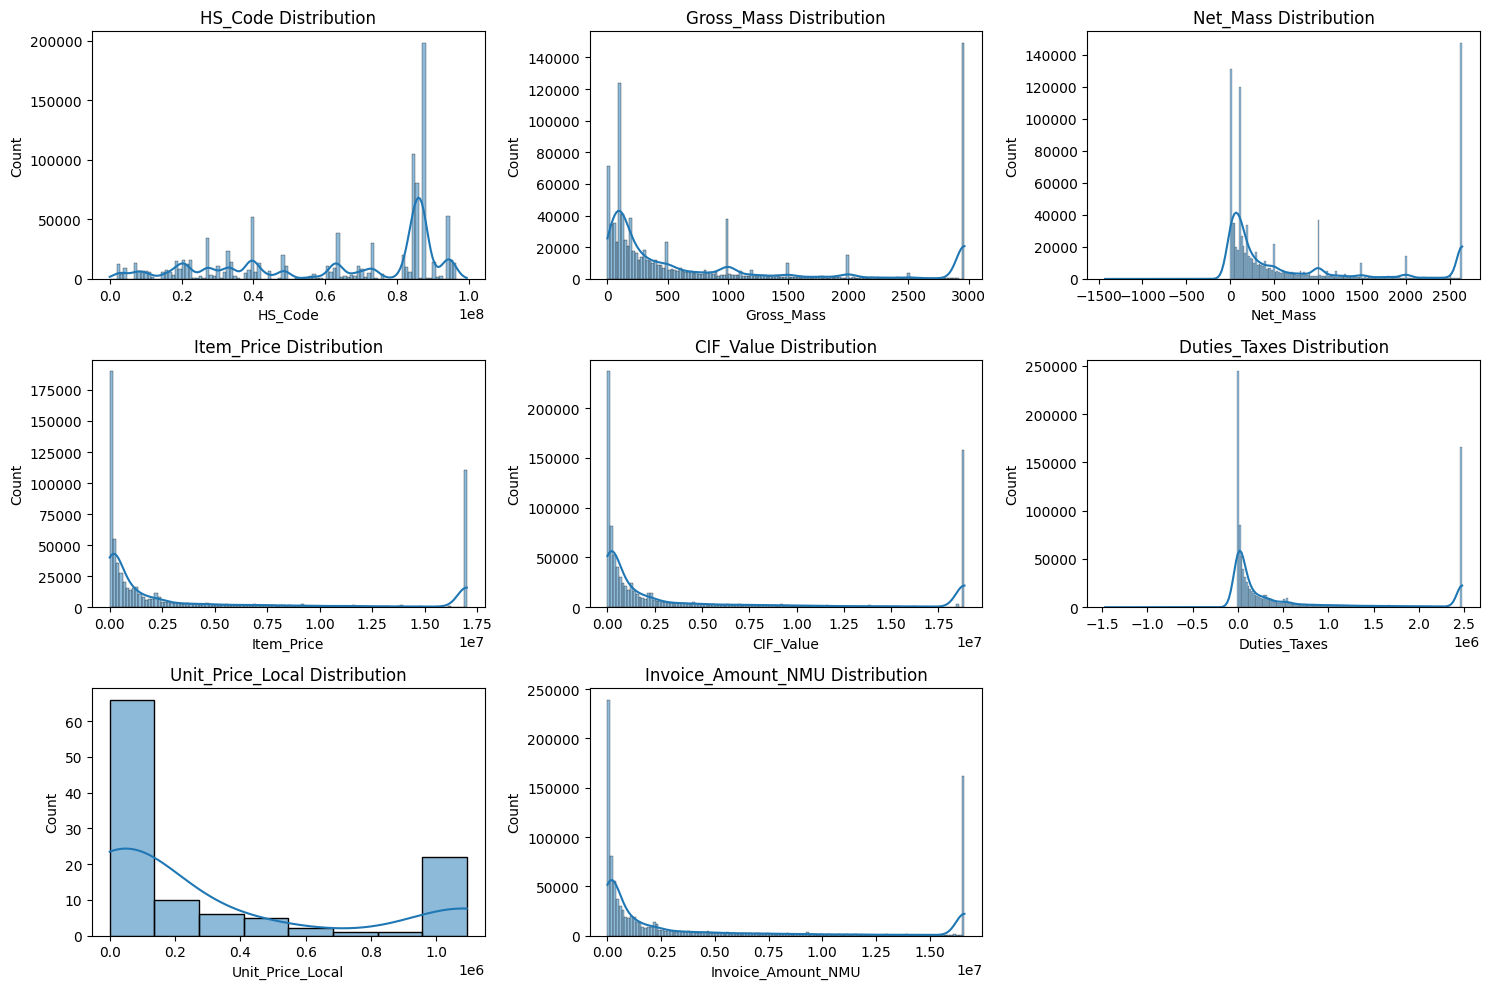

Skewness Values:
 HS_Code              -0.621472
Gross_Mass            1.168848
Net_Mass              1.135912
Item_Price            1.224122
CIF_Value             1.216211
Duties_Taxes          1.205509
Unit_Price_Local      1.161391
Invoice_Amount_NMU    1.211075
dtype: float64


In [31]:
# Visualize skewness using histograms and KDE plots
plt.figure(figsize=(15, 10))
num_cols = len(data_processed.select_dtypes(include=['float64']).columns)
num_rows = (num_cols + 2) // 3

for i, col in enumerate(data_processed.select_dtypes(include=['float64']).columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(data_processed[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.tight_layout()

plt.show()

# Calculate skewness for each numeric column
skewness_values = data_processed.select_dtypes(include=['float64']).skew()
print("Skewness Values:\n", skewness_values)

LOG TRANSFORMATION TO HANDLE EXTREME SKEWNESS
Results expected: Compresses the impact of extreme values and reduces skewness.

In [32]:
# prompt: Logarithmic Transformation:
# Apply log transformations to positively skewed variables: Gross_Mass, Net_Mass, Item_Price, CIF_Value, Duties_Taxes, Unit_Price_Local, and Invoice_Amount_NMU.
# Apply log transformation to specified columns
for col in ['Gross_Mass', 'Net_Mass', 'Item_Price', 'CIF_Value', 'Duties_Taxes', 'Unit_Price_Local', 'Invoice_Amount_NMU']:
    # Add 1 to handle zero values before applying log transformation
    data[col] = np.log1p(data[col])

STANDARDISING/ NORMALIZING VARIABLES

In [34]:
# Standardize variables to ensure equal weighting and prevent skewed features from dominating the model:
# Use z-score normalization (subtract mean, divide by standard deviation) or min-max scaling (scale to [0,1]).

# Identify columns for normalization
columns_to_normalize = ['Gross_Mass', 'Net_Mass', 'Item_Price', 'CIF_Value', 'Duties_Taxes', 'Invoice_Amount_NMU']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
data[columns_to_normalize] = scaler.fit_transform(data_processed[columns_to_normalize])

# Display the first few rows of the normalized data
data.head()

,HS_Code,Country_of_Origin,Gross_Mass,Net_Mass,Item_Price,CIF_Value,Duties_Taxes,Unit_Price_Local,Valuation_Method,Invoice_Amount_NMU,Invoice_Currency_Code
0,85441900.0,CN,0.058928,0.163274,-0.238235,-0.291835,1.973172,NaN,1,-0.236108,USD
1,69010000.0,CN,2.014676,1.989626,0.679762,0.533411,0.812651,NaN,1,0.698336,USD
2,83023000.0,CN,-0.756629,-0.760135,-0.531394,-0.555375,-0.418399,NaN,1,-0.534519,USD
3,94015000.0,CN,-0.644625,-0.654048,0.043320,-0.038728,1.080229,13.765469,1,0.050491,USD
4,94031000.0,CN,-0.644625,-0.654048,0.078315,-0.007268,1.163370,13.810696,1,0.086113,USD


In [35]:
data.shape

(1048575, 11)

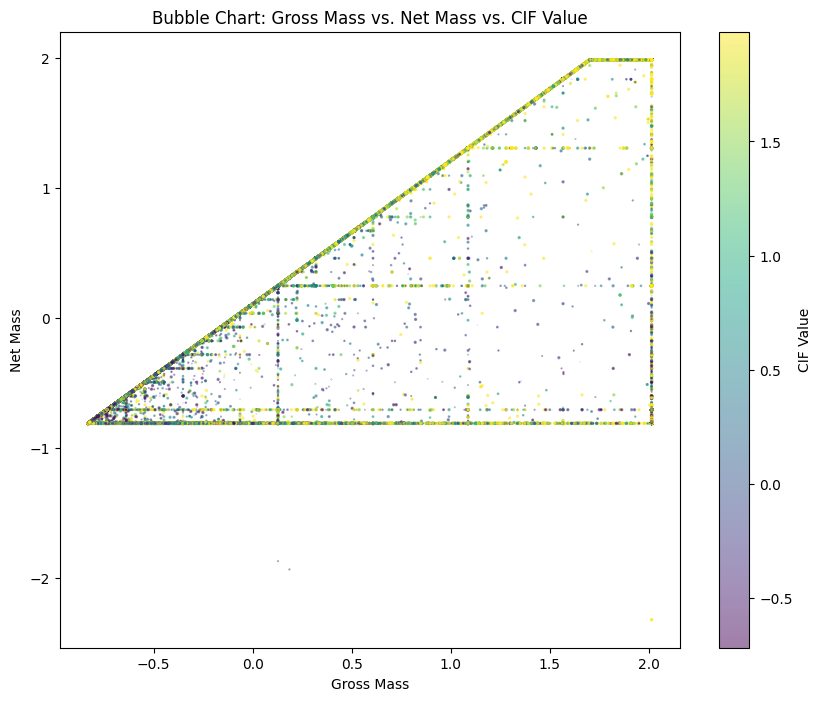

In [36]:
# Bubble Chart: Gross Mass vs. Net Mass vs. CIF Value
# Three-dimensional view of import characteristics
# Size of bubbles represents another metric like Duties/Taxes

import matplotlib.pyplot as plt

# Assuming 'Gross_Mass', 'Net_Mass', and 'CIF_Value' are in your DataFrame 'data'
# and 'Duties_Taxes' is the size metric
plt.figure(figsize=(10, 8))
plt.scatter(data['Gross_Mass'], data['Net_Mass'], s=data['Duties_Taxes'], c=data['CIF_Value'], alpha=0.5)
plt.xlabel('Gross Mass')
plt.ylabel('Net Mass')
plt.title('Bubble Chart: Gross Mass vs. Net Mass vs. CIF Value')
plt.colorbar(label='CIF Value')  # Add a colorbar to show CIF Value mapping
plt.show()

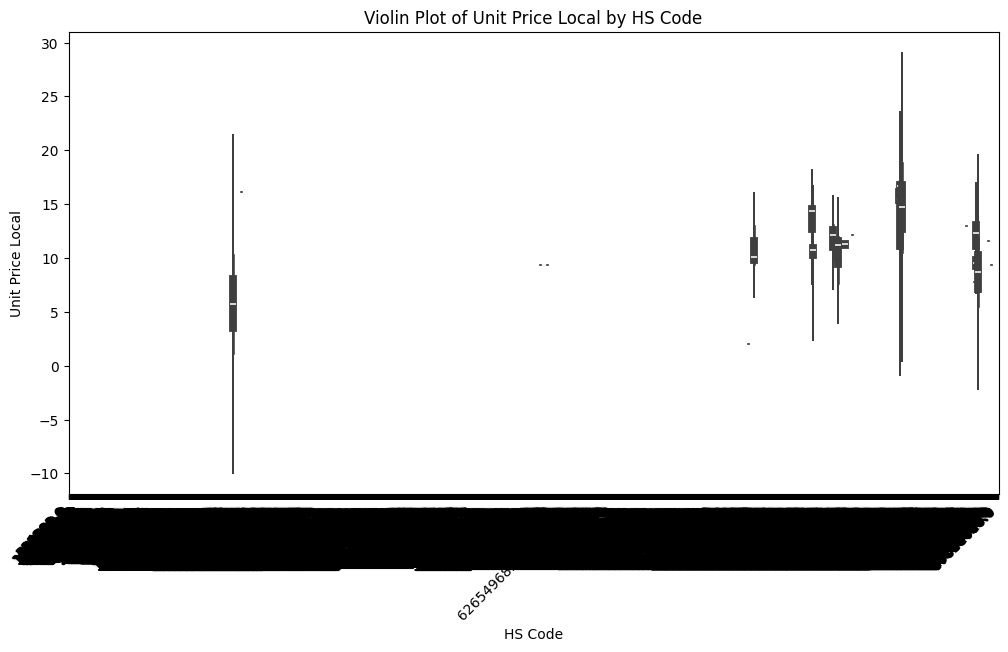

In [38]:
# Shows price distribution across different import categories
# Reveals pricing patterns and variabilities

plt.figure(figsize=(12, 6))
sns.violinplot(x='HS_Code', y='Unit_Price_Local', data=data)
plt.xticks(rotation=45, ha='right')
plt.title('Violin Plot of Unit Price Local by HS Code')
plt.xlabel('HS Code')
plt.ylabel('Unit Price Local')
plt.show()

DATA VISUALIZATION